In [11]:
import numpy as np 
import sys
sys.path.append('..')
import pandas as pd 
from utils import tools as tl 
import matplotlib
from matplotlib import pyplot as pt 
from matplotlib import pyplot as plt
from matplotlib.text import TextPath
import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import itertools
import operator
import numpy as np
import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties


In [12]:
l =pd.read_csv('..\\data\\scanning_mutagenesis.csv')
l = l.drop(columns = 'Unnamed: 0')
l = l.iloc[:,491:512]
x = ()
x = ('A', 0)



In [13]:
# calculate coordinates for floating letters graph

baseline = []

for i in range(0,l.shape[1]):
    base = l.columns[i][-1]
    shortlist = []
    if i == 10:
        shortlist = [base, i-10, 0, 'magenta']
    else:
        shortlist = [base, i-10, 0, 'grey' ]
    baseline.append(shortlist)


line_0 = []

for i in range(0,l.shape[1]):
    ref_base = l.columns[i][-1]
    shortlist = []

    if ref_base == 'G':
        shortlist = ['C', i-10, l.iloc[0][i], 'blue']

    elif ref_base == 'C':
        shortlist = ['T', i-10, l.iloc[0][i], 'red']

    elif ref_base == 'T':
        shortlist = ['A', i-10, l.iloc[0][i], 'green']

    elif ref_base == 'A':
        shortlist = ['G', i-10, l.iloc[0][i], 'gold']
    
    line_0.append(shortlist)

line_1 = []

for i in range(0,l.shape[1]):
    ref_base = l.columns[i][-1]
    shortlist = []

    if ref_base == 'G':
        shortlist = ['T', i-10, l.iloc[1][i], 'red']

    elif ref_base == 'C':
        shortlist = ['A', i-10, l.iloc[1][i], 'green']

    elif ref_base == 'T':
        shortlist = ['G', i-10, l.iloc[1][i], 'gold']

    elif ref_base == 'A':
        shortlist = ['C', i-10, l.iloc[1][i], 'blue']
    
    line_1.append(shortlist)

line_2 = []

for i in range(0,l.shape[1]):
    ref_base = l.columns[i][-1]
    shortlist = []

    if ref_base == 'G':
        shortlist = ['A', i-10, l.iloc[2][i], 'green']

    elif ref_base == 'C':
        shortlist = ['G', i-10, l.iloc[2][i], 'gold']

    elif ref_base == 'T':
        shortlist = ['C', i-10, l.iloc[2][i], 'blue']


    elif ref_base == 'A':
        shortlist = ['T', i-10, l.iloc[2][i], 'red']
    
    line_2.append(shortlist)

line_0

# calculate scores for PPM Sequence Logo using softmax transformation on the lof fold change

PPM = []
for j in range(0, l.shape[1]):

    
    t_2 = ()
    t_3 = ()
    t_4 = ()
    list = []

    ref_base = l.columns[j][-1]
    

    denom = np.exp(0) + np.exp(l.iloc[0][j]) + np.exp(l.iloc[1][j]) + np.exp(l.iloc[2][j]) 
    t_1 = (ref_base, np.exp(0.0)/denom)

    
    if ref_base == 'A':
        t_2 = ('G', np.exp(l.iloc[0][j])/denom)
        t_3 = ('C', np.exp(l.iloc[1][j])/denom)
        t_4 = ('T', np.exp(l.iloc[2][j])/denom)

    elif ref_base == 'T':
        t_2 = ('A', np.exp(l.iloc[0][j])/denom)
        t_3 = ('G', np.exp(l.iloc[1][j])/denom)
        t_4 = ('C', np.exp(l.iloc[2][j])/denom)

    elif ref_base == 'G':
        t_2 = ('C', np.exp(l.iloc[0][j])/denom)
        t_3 = ('T', np.exp(l.iloc[1][j])/denom)
        t_4 = ('A', np.exp(l.iloc[2][j])/denom)

    elif ref_base == 'C':
        t_2 = ('T', np.exp(l.iloc[0][j])/denom)
        t_3 = ('A', np.exp(l.iloc[1][j])/denom)
        t_4 = ('G', np.exp(l.iloc[2][j])/denom)

    def sortSecond(val): 
        return val[1]  

    list = [t_1, t_2, t_3, t_4]
    list.sort(key=sortSecond)  
    PPM.append(list)

PPM

    



[[('T', 0.20405013293505028),
  ('C', 0.2449007214652814),
  ('A', 0.2559946789756292),
  ('G', 0.29505446662403906)],
 [('T', 0.20505669328281964),
  ('A', 0.23879822173946674),
  ('G', 0.24491625461051716),
  ('C', 0.31122883036719634)],
 [('T', 0.2376711104441176),
  ('A', 0.24646255017475474),
  ('G', 0.25405110233579914),
  ('C', 0.2618152370453286)],
 [('T', 0.23255146762719076),
  ('G', 0.24627835450862715),
  ('A', 0.25222235766671586),
  ('C', 0.2689478201974661)],
 [('T', 0.2219860184840305),
  ('C', 0.25012330733772375),
  ('A', 0.25941209721619013),
  ('G', 0.26847857696205557)],
 [('T', 0.21577545966368453),
  ('A', 0.22580013240641722),
  ('C', 0.24858079218842913),
  ('G', 0.3098436157414691)],
 [('T', 0.017097378699967358),
  ('C', 0.02524465621248743),
  ('A', 0.1256801183893414),
  ('G', 0.8319778466982038)],
 [('A', 0.08926370297071998),
  ('G', 0.13125705524462158),
  ('C', 0.3838734987543479),
  ('T', 0.3956057430303106)],
 [('T', 0.007489198922689305),
  ('A', 0.0

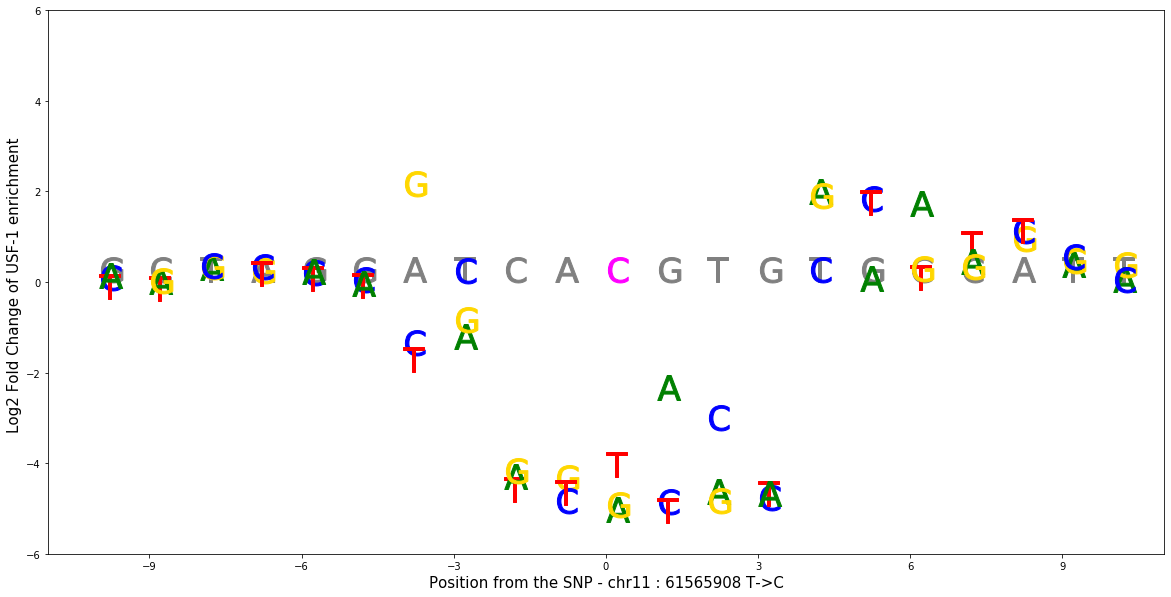

In [14]:
# draw the floating letters graph
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#...


fig, ax = plt.subplots(figsize=(20,10))

for b in baseline:
    path = TextPath((0,0), b[0])
    plt.plot(b[1],b[2],marker=path, alpha=1, markersize=50, color=b[3])

for i in line_0:
    path = TextPath((0,0), i[0])
    plt.plot(i[1],i[2],marker=path, alpha=1, markersize=50, color=i[3])

for k in line_1:
    path = TextPath((0,0), k[0])
    plt.plot(k[1],k[2],marker=path, alpha=1, markersize=50, color=k[3])

for t in line_2:
    path = TextPath((0,0), t[0])
    plt.plot(t[1],t[2],marker=path, alpha=1, markersize=50, color=t[3])

plt.xlim([-11,11])
plt.ylim([-6,6])
ax.set_xlabel('Position from the SNP - chr11 : 61565908 T->C', fontsize=15)
ax.set_ylabel('Log2 Fold Change of USF-1 enrichment ', fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))






In [15]:
fp = FontProperties(family="Arial", weight="bold") 
globscale = 1.35
LETTERS = { "T" : TextPath((-0.305, 0), "T", size=1, prop=fp),
            "G" : TextPath((-0.384, 0), "G", size=1, prop=fp),
            "A" : TextPath((-0.35, 0), "A", size=1, prop=fp),
            "C" : TextPath((-0.366, 0), "C", size=1, prop=fp) }
COLOR_SCHEME = {'G': 'gold', 
                'A': 'red', 
                'C': 'blue', 
                'T': 'green'}

def letterAt(letter, x, y, yscale=1, ax=None):
    text = LETTERS[letter]

    t = mpl.transforms.Affine2D().scale(1*globscale, yscale*globscale) + \
        mpl.transforms.Affine2D().translate(x,y) + ax.transData
    p = PathPatch(text, lw=0, fc=COLOR_SCHEME[letter],  transform=t)
    if ax != None:
        ax.add_artist(p)
    return p

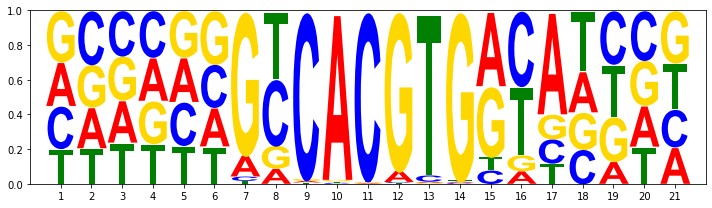

In [16]:
fig, ax = plt.subplots(figsize=(10,3))

all_scores = PPM
x = 1
maxi = 0
for scores in all_scores:
    y = 0
    for base, score in scores:
        letterAt(base, x,y, score, ax)
        y += score
    x += 1
    maxi = max(maxi, y)

plt.xticks(range(1,x))
plt.xlim((0, x)) 
plt.ylim((0, maxi)) 
plt.tight_layout()      
plt.show()

In [1]:
tf_labels

NameError: name 'tf_labels' is not defined